# Homework 2

Radmehr Karimian

98103556

Convex optimization

# Problem 1

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.special import factorial

# Part 4

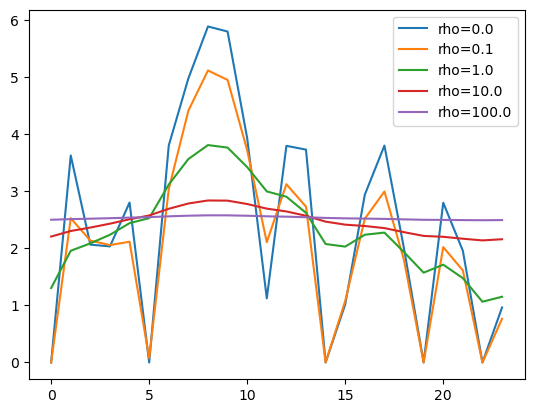

In [6]:
T = 24
N = np.array([0, 4, 2, 2, 3, 0, 4, 5, 6, 6, 4, 1, 4, 4, 0, 1, 3, 4, 2, 0, 3, 2, 0, 1])
lambd = cp.Variable(T, nonneg=True)
rho = cp.Parameter(nonneg=True)
objective = cp.sum(lambd) - N@cp.log(lambd) + rho * (lambd[0] - lambd[-1])**2 + rho * cp.sum_squares(cp.diff(lambd))
problem = cp.Problem(cp.Minimize(objective))
lambdas, rhovalues = [], [0.01,0.1, 1, 10, 100]
for rhovalue in rhovalues:
  rho.value = rhovalue
  problem.solve()
  plt.plot(np.arange(T), lambd.value, label="rho=%.1f" % rhovalue)
  lambdas.append(lambd.value)
plt.legend()

# Part 5

In [4]:
Ntest = np.array([0, 1, 3, 2, 3, 1, 4, 5, 3, 1, 4, 3, 5, 5, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0])
for rhovalue, lambd in zip(rhovalues, lambdas):
  test_logprob = np.sum( np.log( np.exp(-lambd) * lambd**Ntest / factorial(Ntest)))
  print(f"rho = {rhovalue}, log likelihood = {test_logprob}")

rho = 0.01, log likelihood = -103.57326264515629
rho = 0.1, log likelihood = -83.29387277268624
rho = 1, log likelihood = -37.74828664536808
rho = 10, log likelihood = -41.71490239549997
rho = 100, log likelihood = -43.7622693799267


# Problem 2

In [7]:
import cvxpy as cp
import numpy as np

# Part 2

In [8]:
A = np.matrix('1 2 0 1; \
               0 0 3 1; \
               0 3 1 1; \
               2 1 2 5; \
               1 0 3 2')
cmax = np.matrix('100; 100; 100; 100; 100')
p = np.matrix('3; 2; 7; 6')
pdisc = np.matrix('2; 1; 4; 2')
q = np.matrix('4; 10; 5; 10')

x = cp.Variable((4, 1))

t1 = cp.multiply(p, x)
t2 = cp.multiply(p, q) + cp.multiply(pdisc, x - q)

obj = cp.Maximize(cp.sum(cp.minimum(t1, t2)))
cons = [x >= 0, A * x <= cmax]

/Users/apple/condagpu/env/lib/python3.8/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


In [10]:
problem = cp.Problem(obj, cons)
problem.solve()

print("Status:", problem.status)

Status: optimal


In [12]:
r = cp.minimum(t1, t2).value
totr = sum(r)
avgPrice = r / x.value

print("x:\n", x.value)
print("r:\n", r)
print("totr:\n", totr)
print("avgPrice:\n", avgPrice)


x:
 [[ 3.99999996]
 [22.49999989]
 [30.99999995]
 [ 1.50000005]]
r:
 [[ 11.99999989]
 [ 32.49999989]
 [138.99999981]
 [  9.00000032]]
totr:
 [192.49999991]
avgPrice:
 [[3.        ]
 [1.44444445]
 [4.48387097]
 [6.        ]]


# Problem 3

# Part 2

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
n =   100
a =     1
b =     6
c =    10
d = np.array(
    [1.9501, 1.2311, 1.6068, 1.4860, 1.8913, 1.7621, 1.4565, 1.0185, 1.8214, 1.4447, 
     1.6154, 1.7919, 1.9218, 1.7382, 1.1763, 1.4057, 1.9355, 1.9169, 1.4103, 1.8936, 
     1.0579, 1.3529, 1.8132, 1.0099, 1.1389, 1.2028, 1.1987, 1.6038, 1.2722, 1.1988, 
     1.0153, 1.7468, 1.4451, 1.9318, 1.4660, 1.4186, 1.8462, 1.5252, 1.2026, 1.6721,
     1.8381, 1.0196, 1.6813, 1.3795, 1.8318, 1.5028, 1.7095, 1.4289, 1.3046, 1.1897, 
     1.1934, 1.6822, 1.3028, 1.5417, 1.1509, 1.6979, 1.3784, 1.8600, 1.8537, 1.5936, 
     1.4966, 1.8998, 1.8216, 1.6449, 1.8180, 1.6602, 1.3420, 1.2897, 1.3412, 1.5341, 
     1.7271, 1.3093, 1.8385, 1.5681, 1.3704, 1.7027, 1.5466, 1.4449, 1.6946, 1.6213, 
     1.7948, 1.9568, 1.5226, 1.8801, 1.1730, 1.9797, 1.2714, 1.2523, 1.8757, 1.7373, 
     1.1365, 1.0118, 1.8939, 1.1991, 1.2987, 1.6614, 1.2844, 1.4692, 1.0648, 1.9883])
smin = np.array(
    [0.7828, 0.6235, 0.7155, 0.5340, 0.6329, 0.4259, 0.7798, 0.9604, 0.7298, 0.8405, 0.4091, 
     0.5798, 0.9833, 0.8808, 0.6611, 0.7678, 0.9942, 0.2592, 0.8029, 0.2503, 0.6154, 0.5050,
     1.0744, 0.2150, 0.9680, 1.1708, 1.1901, 0.9889, 0.6387, 0.6983, 0.4140, 0.8435, 0.5200,
     1.1601, 0.9266, 0.6120, 0.9446, 0.4679, 0.6399, 1.1334, 0.8833, 0.4126, 1.0392, 0.8288,
     0.3338, 0.4071, 0.8072, 0.8299, 0.5705, 0.7751, 0.6514, 0.2439, 0.2272, 0.5127, 0.2129,
     0.5840, 0.8831, 0.2928, 0.2353, 0.8124, 0.8085, 0.2158, 0.2164, 0.3901, 0.7869, 0.2576,
     0.5676, 0.8315, 0.9176, 0.8927, 0.2841, 0.6544, 0.6418, 0.5533, 0.3536, 0.8756, 0.8992,
     0.9275, 0.6784, 0.7548, 0.3210, 0.6508, 0.9159, 1.0928, 0.4731, 0.4548, 1.0656, 0.4324,
     1.0049, 1.1084, 0.4319, 0.4393, 0.2498, 0.2784, 0.8408, 0.3909, 1.0439, 0.3739, 0.3708,
     1.1943])
smax = np.array(
    [1.9624, 1.6036, 1.6439, 1.5641, 1.7194, 1.9090, 1.3193, 1.3366, 1.9470, 2.8803, 2.5775, 
     1.4087, 1.6039, 2.9266, 1.4369, 2.3595, 3.2280, 1.8890, 2.8436, 0.5701, 1.1894, 2.4425, 
     2.2347, 2.2957, 2.7378, 2.8455, 2.1823, 1.6209, 1.2499, 1.3805, 1.5589, 2.8554, 1.8005, 
     3.0920, 2.1482, 1.8267, 2.1459, 1.5924, 2.7431, 1.4445, 1.7781, 0.8109, 2.7256, 2.4290, 
     2.5997, 1.8125, 1.9073, 1.5275, 2.1209, 2.5419, 1.7032, 0.5636, 1.3669, 2.3200, 2.1006, 
     2.7239, 2.8726, 1.3283, 1.7769, 2.5750, 1.4963, 2.3254, 1.6548, 1.9537, 1.5557, 1.6551, 
     2.7307, 1.8018, 2.5287, 1.9765, 1.8387, 2.3525, 1.7362, 1.6805, 1.9640, 2.8508, 1.9424, 
     2.0780, 2.1677, 2.1863, 2.0541, 1.9734, 2.7687, 2.3715, 1.1449, 2.1560, 3.3310, 2.3456, 
     2.7120, 2.3783, 0.9611, 2.0690, 1.2805, 0.8585, 2.2744, 2.3369, 2.6918, 2.6728, 2.5941, 
     1.6120])
tau_min = np.array(
    [1.0809, 2.7265, 3.5118, 5.3038, 5.4516, 7.1648, 9.2674, 12.1543, 14.4058, 16.6258,
     17.9214, 19.8242, 22.2333, 22.4849, 25.3213, 28.0691, 29.8751, 30.6358, 33.2561, 
     34.7963, 36.9943, 38.2610, 41.1451, 41.3613, 43.0215, 43.8974, 46.4713, 47.4786, 
     49.5192, 49.6795, 50.7495, 52.2444, 53.5477, 55.2351, 57.0850, 57.4250, 60.1198, 
     62.3834, 64.7568, 67.2016, 69.2116, 69.8143, 70.6335, 72.5122, 74.1228, 74.3013, 
     74.5682, 75.3821, 76.6093, 78.0315, 80.7584, 82.5472, 83.5340, 84.9686, 86.7601, 
     87.2445, 89.7329, 92.6013, 94.3879, 94.4742, 96.9105, 98.7409, 100.8453, 101.1219, 
     102.3966, 103.5233, 104.0218, 106.5212, 109.0372, 110.3920, 113.2618, 113.7033, 
     116.3131, 118.6214, 119.9539, 121.8157, 124.6708, 126.5908, 127.3328, 128.3909, 
     128.9545, 130.4264, 131.6542, 133.0448, 134.8776, 135.0912, 136.0340, 137.8591, 
     138.3842, 140.2473, 140.9852, 142.7472, 144.2654, 145.6597, 147.2840, 150.1110, 
     151.1363, 152.3417, 153.2647, 154.4994])
tau_max = np.array(
    [4.6528, 6.5147, 7.5178, 9.7478, 9.0641, 10.3891, 13.1540, 16.0878, 17.4352, 20.9539, 
     22.3695, 23.3875, 25.7569, 26.9019, 29.8890, 33.0415, 33.8218, 35.4414, 37.1583, 39.4054, 
     41.6520, 41.5935, 44.9329, 45.4028, 47.4577, 48.0358, 50.3929, 51.3692, 52.6947, 53.5665, 
     54.4821, 55.8495, 58.2514, 59.7541, 61.9845, 61.5409, 63.1482, 66.5758, 69.3892, 72.1558, 
     72.6555, 74.2216, 74.6777, 77.3780, 78.5495, 77.7574, 78.4675, 78.7265, 81.5470, 81.7429, 
     83.8565, 87.0579, 88.3237, 88.5409, 90.2625, 92.1100, 92.9949, 97.4829, 98.7916, 99.1695, 
     100.3291, 102.6510, 104.0075, 105.8242, 106.5207, 107.1619, 107.7716, 111.2568, 112.7815, 
     113.5394, 116.6615, 116.8022, 120.4465, 121.8652, 123.9981, 125.0498, 129.2106, 130.3409, 
     131.9796, 131.4842, 133.1503, 135.3247, 135.2318, 137.8225, 138.0808, 138.2218, 139.5026, 
     142.7253, 141.5105, 143.7757, 145.9842, 146.1712, 148.2622, 149.2407, 151.6295, 155.0270, 
     155.6694, 156.6739, 156.5266, 157.6903])

In [3]:
t = cp.Variable(n)

tau = [t[0]]
for i in range(1, n):
  tau += [tau[i-1] + t[i]]
s = [d[i]*cp.inv_pos(t[i]) for i in range(n)]

phi_total = 0
for i in range(n):
  phi_total += a * (d[i] ** 2) * cp.power(t[i], -1) + b * d[i] + c * t[i]
obj = cp.Minimize(phi_total)

constraints = [t[i] >= d[i]/smax[i] for i in range(n)]
constraints += [t[i] <= d[i]/smin[i] for i in range(n)]
constraints += [tau[i] <= tau_max[i] for i in range(n)]
constraints += [tau[i] >= tau_min[i] for i in range(n)]  
  
problem = cp.Problem(obj, constraints)
print("DCP is", problem.is_dcp())

DCP is True


In [4]:
problem.solve()

print("Status:", problem.status)

Status: optimal



Minimum fuel consumption is:
 2617.8251936196916

Optimal t value is:
 [2.04079453 1.28835558 1.68152848 1.55511036 1.97925994 1.84405111
 1.74687183 1.06049562 2.18451913 1.71885761 1.93745035 2.14913788
 1.95443913 1.97343321 1.41081038 1.68594421 1.94679138 2.29905841
 1.69146118 3.32152255 1.26880583 1.62261783 1.68763961 1.21123633
 1.17654958 1.02733174 1.00722628 1.62180199 1.46104427 1.37674894
 1.16601036 2.00609356 1.65960953 1.66520127 1.58212819 1.62917588
 1.95447807 1.75159936 1.38111302 1.47529557 2.00999998 1.25736836
 1.45622813 1.19482944 1.58658107 1.30162354 1.48065308 1.23761636
 1.22517442 1.11726966 1.12074439 2.98474095 1.22348398 1.44783946
 1.08083183 1.5945298  1.29448136 1.74676095 1.74084453 1.49657976
 1.4054852  1.78413789 1.71069881 1.54475652 1.70731802 1.55912504
 1.26029744 1.47579857 1.46163903 1.71849439 1.97631374 1.49822676
 2.1037882  1.7943706  1.56814329 1.94460854 1.71997326 1.55784364
 1.38286228 1.32304651 1.46462954 1.5968281  1.24250332 1

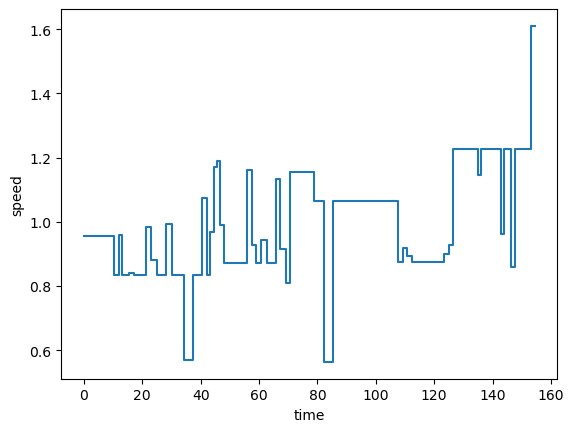

In [5]:
t_val = t.value
s_val = d/t_val
tau_val = [t_val[0]]
for i in range(1, n):
  tau_val += [tau_val[i-1] + t_val[i]]

print('\nMinimum fuel consumption is:\n', problem.value)
print('\nOptimal t value is:\n',t_val)
print('\nOptimal s value is:\n',s_val,'\n')
tau_val = [0] + tau_val
s_val = np.array([s_val[0]]+list(s_val))
plt.step(tau_val, s_val)
plt.xlabel('time')
plt.ylabel('speed')
plt.show()

# Problem 4

In [13]:
import cvxpy as cp

# Part 1

In [14]:
x = cp.Variable()
y = cp.Variable()
prob = cp.Problem(
    cp.Minimize(x + y),
    [
        cp.inv_pos(x) + cp.inv_pos(y) <= 1,
    ],
)
prob.solve()
print("Optimal value:", prob.value)
print("x:", x.value)
print("y:", y.value)

Optimal value: 3.9999999959600627
x: 1.9999999979803478
y: 1.9999999979797147


# Part 2

In [15]:
x = cp.Variable()
y = cp.Variable()

constraint = [x >= cp.inv_pos(y)]
objective = cp.Minimize(x + y)
problem = cp.Problem(objective, constraint)
problem.solve()

print("Optimal value of x:", x.value)
print("Optimal value of y:", y.value)

Optimal value of x: 0.9999999961794381
Optimal value of y: 0.9999999973328436


# Part 3

In [16]:

x = cp.Variable()
y = cp.Variable(pos=True)

prob = cp.Problem(
    cp.Minimize(x + y),
    [
        cp.quad_over_lin(x + y, cp.sqrt(y)) <= x - y + 5,
        #           2.4189                   = 2.4189                       
    ],
)
prob.solve()

print("Optimal value:", prob.value)
print("x:", x.value)
print("y:", y.value)

Optimal value: -1.3715395932143184
x: -1.9762812232748985
y: 0.6047416300605801


# Part 4

In [17]:
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()

sqrt_term = cp.sqrt(y * (x - cp.square(z) / y))
constraint = x + z <= 1 + cp.geo_mean(cp.hstack([x - cp.quad_over_lin(z, y), y]))
prob = cp.Problem(cp.Minimize(0), [constraint, x >= 0, y >= 0])
prob.solve()

print("Status:", prob.status)
print("Optimal x:", x.value)
print("Optimal y:", y.value)
print("Optimal z:", z.value)


Status: optimal
Optimal x: 0.7644354989288655
Optimal y: 0.7794681072524083
Optimal z: -0.1255884084504698
